278470.KS 데이터 (최근 5년):
 Price          Close      High       Low      Open    Volume
Ticker     278470.KS 278470.KS 278470.KS 278470.KS 278470.KS
Date                                                        
2025-07-31  183700.0  188500.0  175900.0  176000.0    630657
2025-08-01  172000.0  180400.0  167800.0  179800.0    612884
2025-08-04  178600.0  179500.0  173100.0  173500.0    334690
2025-08-05  187300.0  189700.0  181400.0  184500.0    595552
2025-08-06  208500.0  224000.0  185200.0  194700.0   2829191

이동평균 및 거래 신호 데이터:
 Price          Close           5_MA          20_MA          50_MA  \
Ticker     278470.KS                                                
Date                                                                
2025-07-24  170310.0  171015.134375  159767.231250  137513.325625   
2025-07-25  171700.0  172057.031250  161070.719531  138804.494844   
2025-07-28  167500.0  171847.600000  161894.885156  139990.118281   
2025-07-29  181300.0  173281.703125  163409.050781  14

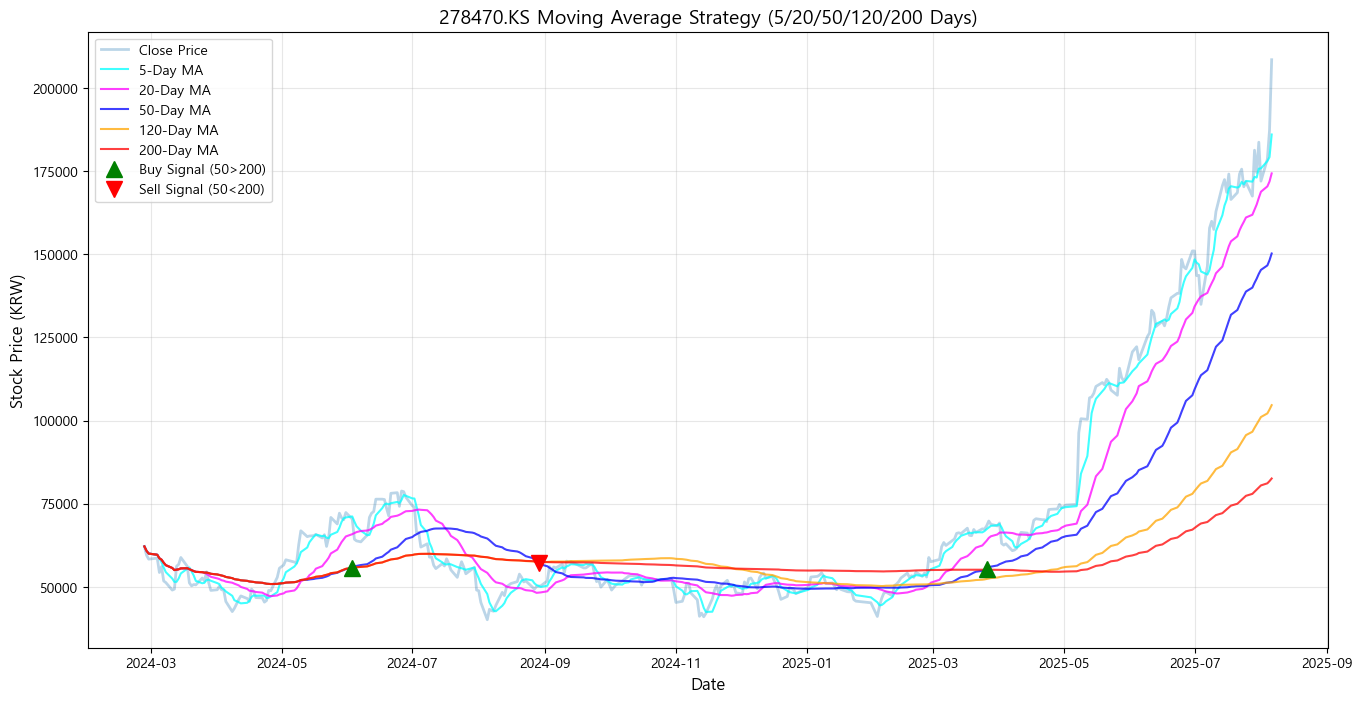

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 데이터 다운로드
ticker = '278470.KS'  # 한국주식 티커 (KS: 코스피, KQ: 코스닥)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

if data.empty:
    print(f"{ticker}에 대한 데이터를 가져오는 데 실패했습니다. 티커를 확인하거나 날짜 범위를 조정해 주세요.")
else:
    print(f"{ticker} 데이터 (최근 5년):\n", data.tail())

    # 2. 이동평균 계산 (기존 50일, 200일 + 새로 추가)
    windows = [5, 20, 50, 120, 200]  # 5일, 20일, 50일, 120일, 200일
    ma_labels = ['5-Day', '20-Day', '50-Day', '120-Day', '200-Day']
    colors = ['cyan', 'magenta', 'blue', 'orange', 'red']  # 각 이평선 색상
    
    for window, label in zip(windows, ma_labels):
        data[f'{window}_MA'] = data['Close'].rolling(window=window, min_periods=1).mean()

    # 3. 거래 신호 생성 (기존 전략 유지 - 50일 vs 200일 기준)
    data['Signal'] = 0
    data.loc[data.index[50:], 'Signal'] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1, 0)
    data['Position'] = data['Signal'].diff()

    print("\n이동평균 및 거래 신호 데이터:\n", data[['Close', '5_MA', '20_MA', '50_MA', '120_MA', '200_MA', 'Signal', 'Position']].tail(10))

    # 4. 시각화 (추가된 이평선 반영)
    plt.figure(figsize=(16, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.3, linewidth=2)

    # 모든 이동평균선 플롯
    for window, color, label in zip(windows, colors, ma_labels):
        plt.plot(data[f'{window}_MA'], label=f'{label} MA', color=color, alpha=0.75)

    # 매수/매도 신호 표시 (기존 전략 기준)
    plt.plot(data[data['Position'] == 1].index,
             data['50_MA'][data['Position'] == 1],
             '^', markersize=12, color='g', lw=0, label='Buy Signal (50>200)')
    plt.plot(data[data['Position'] == -1].index,
             data['50_MA'][data['Position'] == -1],
             'v', markersize=12, color='r', lw=0, label='Sell Signal (50<200)')

    plt.title(f'{ticker} Moving Average Strategy (5/20/50/120/200 Days)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (KRW)', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.show()


278470.KS 데이터 (최근 5년):
 Price          Close      High       Low      Open    Volume
Ticker     278470.KS 278470.KS 278470.KS 278470.KS 278470.KS
Date                                                        
2025-07-31  183700.0  188500.0  175900.0  176000.0    630657
2025-08-01  172000.0  180400.0  167800.0  179800.0    612884
2025-08-04  178600.0  179500.0  173100.0  173500.0    334690
2025-08-05  187300.0  189700.0  181400.0  184500.0    595552
2025-08-06  208500.0  224000.0  185200.0  194700.0   2829191

이동평균 및 거래 신호 데이터:
 Price          Close           5_MA          20_MA          50_MA  \
Ticker     278470.KS                                                
Date                                                                
2025-07-24  170310.0  171015.134375  159767.231250  137513.325625   
2025-07-25  171700.0  172057.031250  161070.719531  138804.494844   
2025-07-28  167500.0  171847.600000  161894.885156  139990.118281   
2025-07-29  181300.0  173281.703125  163409.050781  14

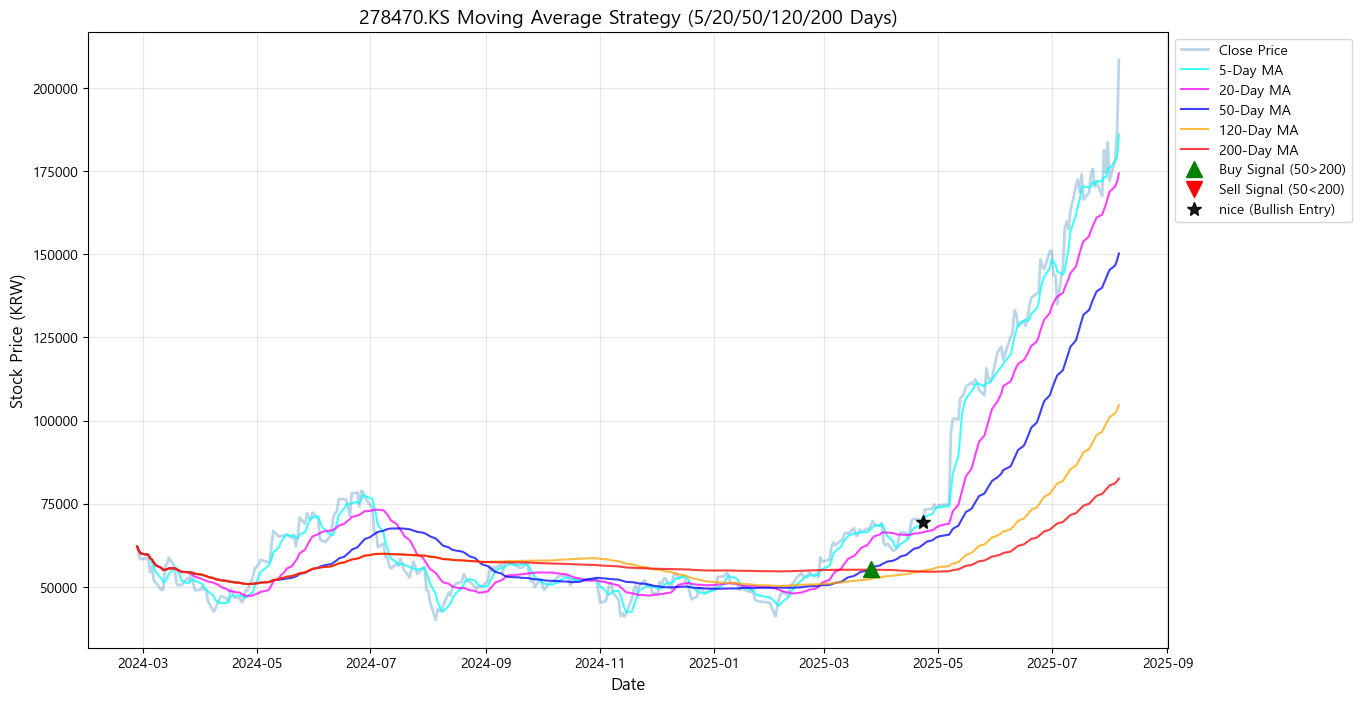

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 데이터 다운로드
ticker = '278470.KS'  # 한국주식 티커 (KS: 코스피, KQ: 코스닥)
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

if data.empty:
    print(f"{ticker}에 대한 데이터를 가져오는 데 실패했습니다. 티커를 확인하거나 날짜 범위를 조정해 주세요.")
else:
    print(f"{ticker} 데이터 (최근 5년):\n", data.tail())

    # 2. 이동평균 계산 (기존 50일, 200일 + 새로 추가)
    windows = [5, 20, 50, 120, 200]  # 5일, 20일, 50일, 120일, 200일
    ma_labels = ['5-Day', '20-Day', '50-Day', '120-Day', '200-Day']
    colors = ['cyan', 'magenta', 'blue', 'orange', 'red']  # 각 이평선 색상
    
    for window, label in zip(windows, ma_labels):
        data[f'{window}_MA'] = data['Close'].rolling(window=window, min_periods=1).mean()

    # 3. 거래 신호 생성 (기존 전략 유지 - 50일 vs 200일 기준)
    data['Signal'] = 0
    # 200일 MA를 사용하므로 최소 200일 데이터 필요
    min_signal_idx = max(50, 200) 
    if len(data) > min_signal_idx:
        data.loc[data.index[min_signal_idx:], 'Signal'] = np.where(data['50_MA'][min_signal_idx:] > data['200_MA'][min_signal_idx:], 1, 0)
    else:
        print("Warning: Not enough data points to generate full 50-day and 200-day MA signals.")
        data['Signal'] = 0 
        
    data['Position'] = data['Signal'].diff()

    # 4. 정배열 'nice' 신호 생성 및 진입 신호 (추가된 부분)
    min_bullish_idx = max(windows) # 모든 MA가 계산될 수 있는 충분한 데이터가 필요합니다.
    
    if len(data) > min_bullish_idx:
        # 4-1. 모든 MA가 정배열인 상태를 나타내는 임시 컬럼 생성 (5 > 20 > 50 > 120 > 200)
        data['Is_Bullish_Aligned'] = np.where(
            (data['5_MA'] > data['20_MA']) &
            (data['20_MA'] > data['50_MA']) &
            (data['50_MA'] > data['120_MA']) &
            (data['120_MA'] > data['200_MA']),
            1, 0
        )
        
        # 4-2. 역정배열에서 정배열로 '전환'되는 시점만 포착하여 'Nice_Entry_Signal' 생성
        data['Nice_Entry_Signal'] = np.where(
            (data['Is_Bullish_Aligned'].shift(1) == 0) & (data['Is_Bullish_Aligned'] == 1),
            1, 0
        )
        # NaN 값(초기 부분)은 0으로 채움
        data['Nice_Entry_Signal'] = data['Nice_Entry_Signal'].fillna(0)
    else:
        data['Is_Bullish_Aligned'] = 0
        data['Nice_Entry_Signal'] = 0 # 데이터가 부족하면 신호 없음


    print("\n이동평균 및 거래 신호 데이터:\n", data[['Close', '5_MA', '20_MA', '50_MA', '120_MA', '200_MA', 'Signal', 'Position', 'Is_Bullish_Aligned', 'Nice_Entry_Signal']].tail(10))

    # 5. 시각화 (추가된 이평선 반영)
    plt.figure(figsize=(16, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.3, linewidth=2)

    # 모든 이동평균선 플롯
    for window, color, label in zip(windows, colors, ma_labels): # <-- 이 부분에 'colors' 추가
        plt.plot(data[f'{window}_MA'], label=f'{label} MA', color=color, alpha=0.75)

    # 매수/매도 신호 표시 (기존 전략 기준)
    plt.plot(data[data['Position'] == 1].index,
             data['50_MA'][data['Position'] == 1],
             '^', markersize=12, color='g', lw=0, label='Buy Signal (50>200)')
    plt.plot(data[data['Position'] == -1].index,
             data['50_MA'][data['Position'] == -1],
             'v', markersize=12, color='r', lw=0, label='Sell Signal (50<200)')

    # 정배열 'nice' 진입 신호 표시 추가
    plt.plot(data[data['Nice_Entry_Signal'] == 1].index,
             data['Close'][data['Nice_Entry_Signal'] == 1], # 종가 위치에 마커 표시
             '*', markersize=10, color='black', alpha=0.9, lw=0, label='nice (Bullish Entry)')


    plt.title(f'{ticker} Moving Average Strategy (5/20/50/120/200 Days)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (KRW)', fontsize=12) # 한국 주식 기준 화폐 단위
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10) # 범례를 그래프 밖에 배치
    plt.subplots_adjust(right=0.8) # 그래프 오른쪽 여백을 늘려 범례가 들어갈 공간 확보
    plt.grid(True, alpha=0.3)
    plt.show()


✅ 278470.KS 최근 1년 데이터 (정배열 분석)



C:\Users\glasr\AppData\Local\Temp\ipykernel_31072\3773390031.py:66: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()
C:\Users\glasr\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


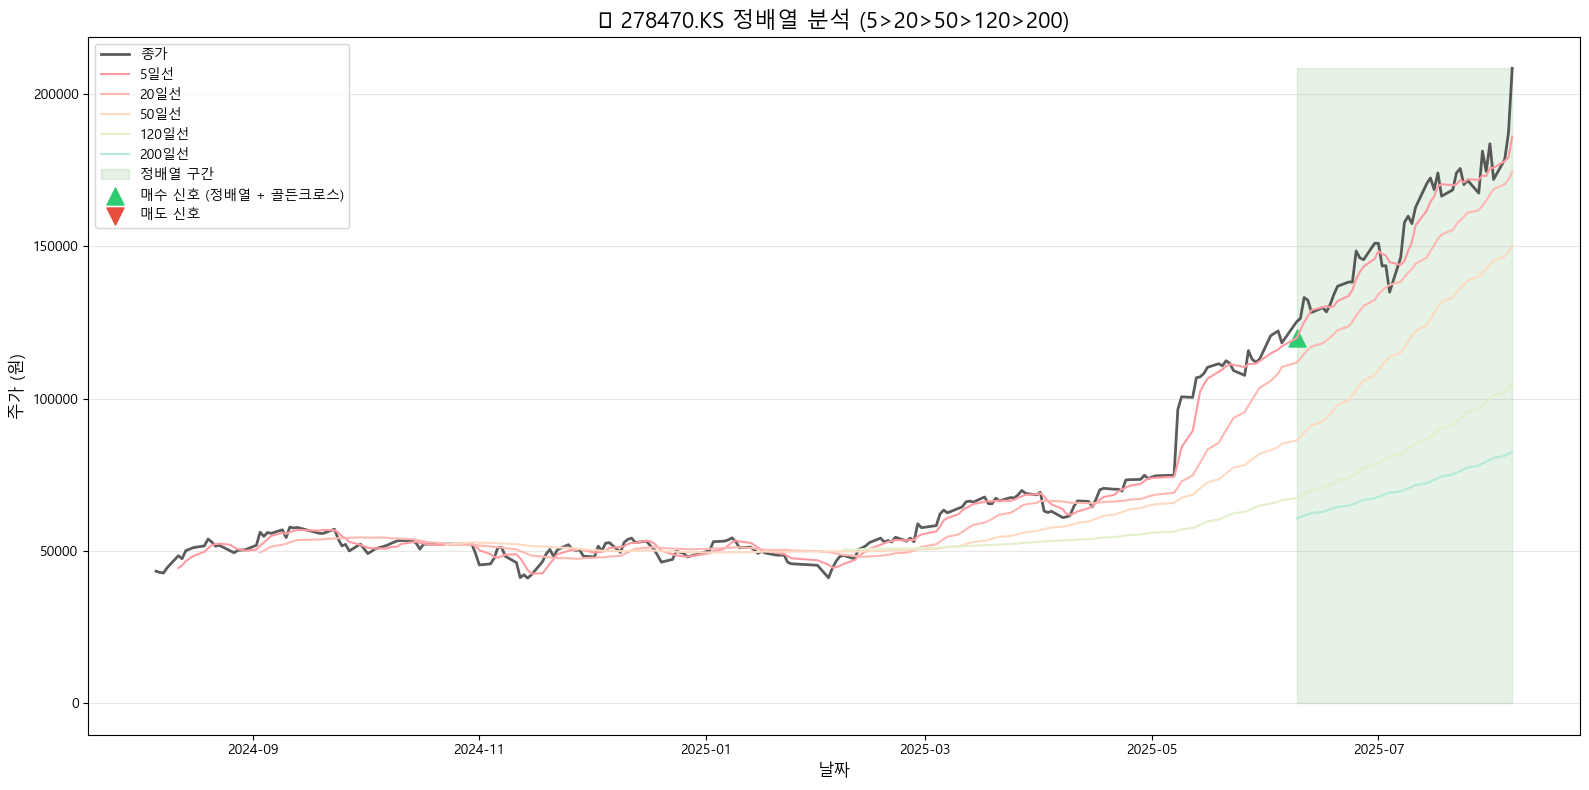

📈 최근 상태: 정배열
📊 5일선 위치: 186020원
📉 200일선 위치: 82607원



In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. 데이터 다운로드
ticker = '278470.KS'  # 에스앤디 (코스닥)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)  # 최근 1년 데이터로 분석

data = yf.download(ticker, start=start_date, end=end_date, progress=False)

if data.empty:
    print(f"⚠️ {ticker} 데이터 불러오기 실패!")
else:
    print(f"✅ {ticker} 최근 1년 데이터 (정배열 분석)\n")

    # 2. 이동평균 계산 (5일선 포함)
    windows = [5, 20, 50, 120, 200]
    ma_labels = ['5일', '20일', '50일', '120일', '200일']
    
    for window in windows:
        data[f'MA_{window}'] = data['Close'].rolling(window=window).mean()

    # 3. 정배열 여부 판단 (5>20>50>120>200)
    data['정배열'] = (
        (data['MA_5'] > data['MA_20']) & 
        (data['MA_20'] > data['MA_50']) & 
        (data['MA_50'] > data['MA_120']) & 
        (data['MA_120'] > data['MA_200'])
    )

    # 4. 거래 신호 (정배열 + 5일선 > 20일선 골든크로스 시 매수)
    data['Signal'] = 0
    data.loc[data['정배열'] & (data['MA_5'] > data['MA_20']), 'Signal'] = 1
    data['Position'] = data['Signal'].diff()

    # 5. 시각화 (정배열 강조)
    plt.figure(figsize=(16, 8))
    
    # 주가 및 이평선
    plt.plot(data['Close'], label='종가', color='#333333', lw=2, alpha=0.8)
    colors = ['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB', '#B5EAD7']
    for window, color in zip(windows, colors):
        plt.plot(data[f'MA_{window}'], label=f'{window}일선', color=color, lw=1.5)

    # 정배열 구간 색칠
    plt.fill_between(data.index, 0, data['Close'].max(), 
                    where=data['정배열'], 
                    color='green', alpha=0.1, label='정배열 구간')

    # 매수/매도 신호
    plt.scatter(data[data['Position'] == 1].index,
               data['MA_5'][data['Position'] == 1],
               marker='^', s=150, color='#2ECC71', label='매수 신호 (정배열 + 골든크로스)')
    plt.scatter(data[data['Position'] == -1].index,
               data['MA_5'][data['Position'] == -1],
               marker='v', s=150, color='#E74C3C', label='매도 신호')

    plt.title(f'🚀 {ticker} 정배열 분석 (5>20>50>120>200)', fontsize=16)
    plt.xlabel('날짜', fontsize=12)
    plt.ylabel('주가 (원)', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 6. 최근 정배열 상태 출력
    recent_status = "정배열" if data['정배열'].iloc[-1] else "역배열 또는 비정배열"
    print(f"📈 최근 상태: {recent_status}")
    print(f"📊 5일선 위치: {data['MA_5'].iloc[-1]:.0f}원")
    print(f"📉 200일선 위치: {data['MA_200'].iloc[-1]:.0f}원\n")

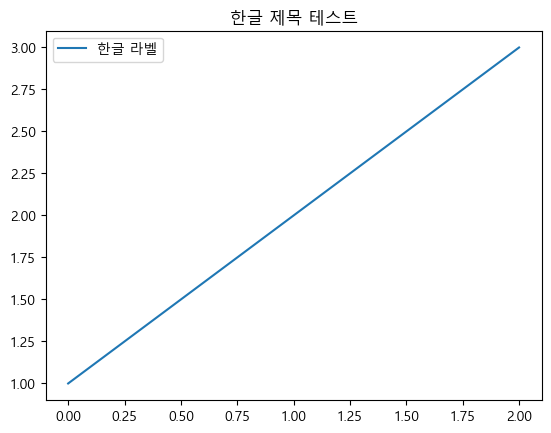

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 시스템에 설치된 한글 폰트 찾기
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
kor_font = [f for f in font_path if 'malgun' in f.lower() or 'gothic' in f.lower()][0]  # 맑은 고딕 또는 굴림체 선택

# 2. 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기준
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 3. 그래프 출력
plt.title('한글 제목 테스트')
plt.plot([1, 2, 3], label='한글 라벨')
plt.legend()
plt.show()